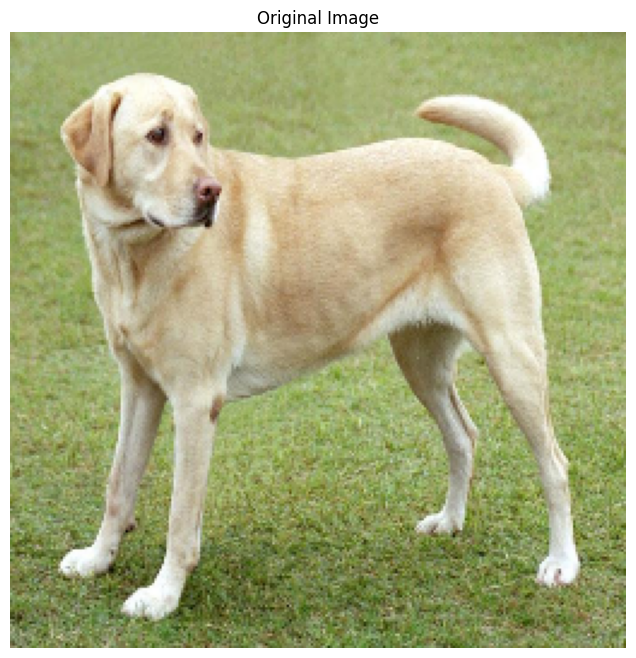

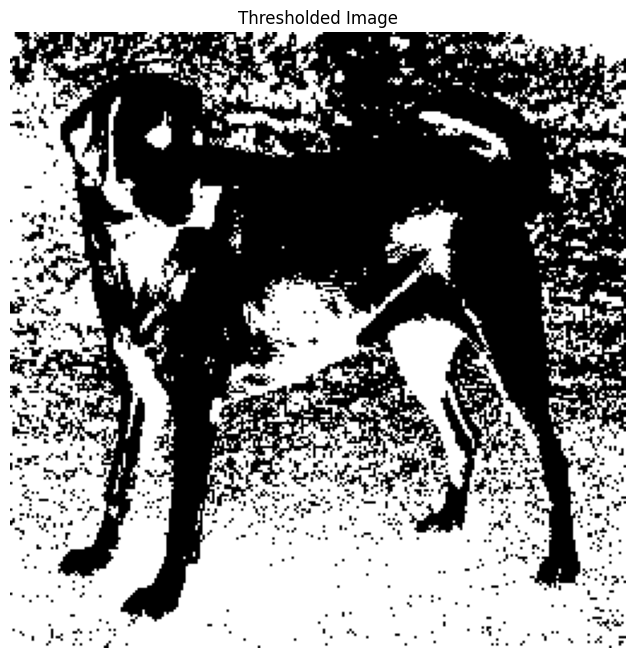

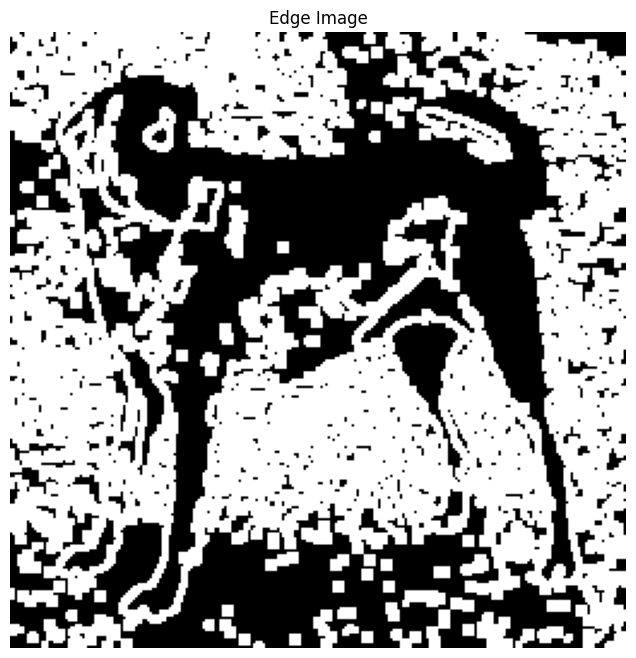

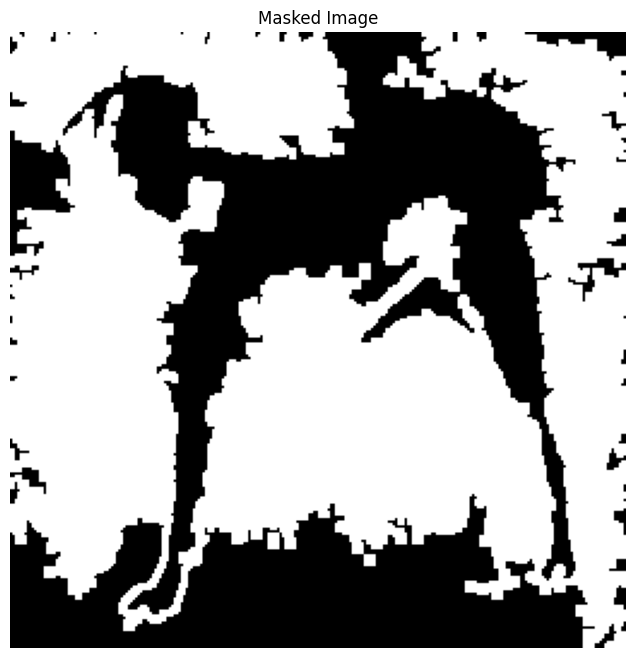

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

sample_image = cv2.imread('C:/Users/Dewmi Silva/Downloads/YellowLabradorLooking_new.jpg')
img = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(256,256))
# Show the original image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
# Show the thresholded image
plt.figure(figsize=(8, 8))
plt.imshow(thresh, cmap="gray")
plt.axis('off')
plt.title("Thresholded Image")
plt.show()

edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
# Show the edge image
plt.figure(figsize=(8, 8))
plt.imshow(edges, cmap="gray")
plt.axis('off')
plt.title("Edge Image")
plt.show()

cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
# Show the masked image
plt.figure(figsize=(8, 8))
plt.imshow(masked, cmap="gray")
plt.axis('off')
plt.title("Masked Image")
plt.show()

dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
